In [1]:
import pandas as pd

blood_transfusion = pd.read_csv("../datasets/blood_transfusion.csv")
target_name = "Class"
data = blood_transfusion.drop(columns=target_name)
target = blood_transfusion[target_name]

In [2]:
data.head()

,Recency,Frequency,Monetary,Time
0,2,50,12500,98
1,0,13,3250,28
2,1,16,4000,35
3,2,20,5000,45
4,1,24,6000,77


In [6]:
target.unique()

array(['donated', 'not donated'], dtype=object)

In [7]:
target.value_counts(normalize=True)

not donated    0.762032
donated        0.237968
Name: Class, dtype: float64

In [8]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")

In [9]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dummy_clf, data, target, cv=10)

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.76 accuracy with a standard deviation of 0.00


In [10]:
scores = cross_val_score(dummy_clf, data, target, cv=10, scoring="balanced_accuracy")

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.50 accuracy with a standard deviation of 0.00


In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

model = make_pipeline(StandardScaler(), KNeighborsClassifier())
model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [19]:
 model.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'kneighborsclassifier': KNeighborsClassifier(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__leaf_size': 30,
 'kneighborsclassifier__metric': 'minkowski',
 'kneighborsclassifier__metric_params': None,
 'kneighborsclassifier__n_jobs': None,
 'kneighborsclassifier__n_neighbors': 5,
 'kneighborsclassifier__p': 2,
 'kneighborsclassifier__weights': 'uniform'}

In [23]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(
    model, data, target, cv=10, scoring="balanced_accuracy", return_train_score=True
)
cv_results = pd.DataFrame(cv_results)
cv_results[["train_score", "test_score"]].mean()

train_score    0.699447
test_score     0.529128
dtype: float64

In [27]:
from sklearn.model_selection import validation_curve

model = make_pipeline(StandardScaler(), KNeighborsClassifier())

param_range = [1, 2, 5, 10, 20, 50, 100, 200, 500]
train_scores, test_scores = validation_curve(
    model, data, target, param_name="kneighborsclassifier__n_neighbors", param_range=param_range,
    cv=5, scoring="balanced_accuracy")

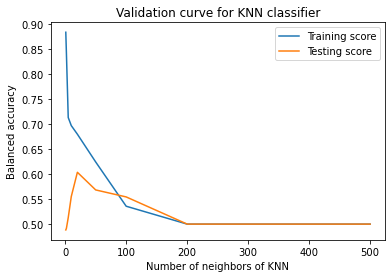

In [30]:
import matplotlib.pyplot as plt

plt.plot(param_range, train_scores.mean(axis=1), label="Training score")
plt.plot(param_range, test_scores.mean(axis=1), label="Testing score")
plt.legend()

plt.xlabel("Number of neighbors of KNN")
plt.ylabel("Balanced accuracy")
_ = plt.title("Validation curve for KNN classifier")

Text(0.5, 1.0, 'Validation curve of K-nearest neighbors')

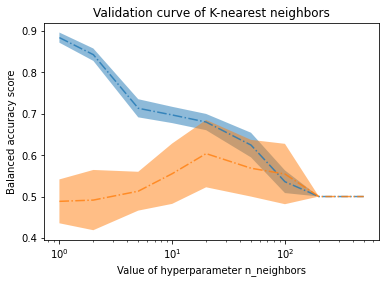

In [31]:
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt

param_range = [1, 2, 5, 10, 20, 50, 100, 200, 500]
param_name = "kneighborsclassifier__n_neighbors"
train_scores, test_scores = validation_curve(
    model, data, target, param_name=param_name, param_range=param_range, cv=5,
    n_jobs=2, scoring="balanced_accuracy")

_, ax = plt.subplots()
for name, scores in zip(
    ["Training score", "Testing score"], [train_scores, test_scores]
):
    ax.plot(
        param_range, scores.mean(axis=1), linestyle="-.", label=name,
        alpha=0.8)
    ax.fill_between(
        param_range, scores.mean(axis=1) - scores.std(axis=1),
        scores.mean(axis=1) + scores.std(axis=1),
        alpha=0.5, label=f"std. dev. {name.lower()}")

ax.set_xticks(param_range)
ax.set_xscale("log")
ax.set_xlabel("Value of hyperparameter n_neighbors")
ax.set_ylabel("Balanced accuracy score")
ax.set_title("Validation curve of K-nearest neighbors")